Machine Learning Final Project

Madelyn Caufield 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit-approval_csv.csv to credit-approval_csv.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['credit-approval_csv.csv']))
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [ ]:
df_new = df.rename(columns={'A1': 'Gender', 'A2': 'Age', 'A3': 'Debt', 'A4': 'Married', 'A5': 'BankCustomer', 'A6': 'EducationLevel', 'A7': 'Ethnicity', 'A8': 'YearsEmployed', 'A9': 'PriorDefault', 'A10': 'Employed', 'A11': 'CreditScore', 'A12': 'DriversLicense', 'A13': 'Citizen', 'A14': 'Zip', 'A15': 'Income', 'class': 'Approved'})
df_new

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Zip,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [ ]:
df_new = (df_new.replace(to_replace=['-', '+', 'b', 'a', 'f', 't', '?'], value=['0','1','0','1','0','1', np.nan]))
df_new

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Zip,Income,Approved
0,0,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,202.0,0,1
1,1,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,43.0,560,1
2,1,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,280.0,824,1
3,0,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,100.0,3,1
4,0,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,y,p,e,h,1.25,0,0,0,0,g,260.0,0,0
686,1,22.67,0.750,u,g,c,v,2.00,0,1,2,1,g,200.0,394,0
687,1,25.25,13.500,y,p,ff,ff,2.00,0,1,1,1,g,200.0,1,0
688,0,17.92,0.205,u,g,aa,v,0.04,0,0,0,0,g,280.0,750,0


In [ ]:
df_new.isnull().values.any()

True

In [ ]:
df_new.isnull().sum().sum()

67

In [ ]:
count_nan_in_df = df_new.isnull().sum()
print (count_nan_in_df)

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
Zip               13
Income             0
Approved           0
dtype: int64


In [ ]:
DataFrame = df_new
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

for Columns in ['Gender','Age','Married','BankCustomer','EducationLevel','Ethnicity','Zip']:
    impute_nan_most_frequent_category(DataFrame,Columns)

DataFrame[['Gender','Gender_Imputed','Age','Age_Imputed','Married','Married_Imputed','BankCustomer','BankCustomer_Imputed','EducationLevel','EducationLevel_Imputed','Ethnicity','Ethnicity_Imputed','Zip','Zip_Imputed']].head(10)

DataFrame = DataFrame.drop(['Gender','Age','Married','BankCustomer','EducationLevel','Ethnicity','Zip'], axis = 1)

DataFrame

,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved,Gender_Imputed,Age_Imputed,Married_Imputed,BankCustomer_Imputed,EducationLevel_Imputed,Ethnicity_Imputed,Zip_Imputed
0,0.000,1.25,1,1,1,0,g,0,1,0,30.83,u,g,w,v,202.0
1,4.460,3.04,1,1,6,0,g,560,1,1,58.67,u,g,q,h,43.0
2,0.500,1.50,1,0,0,0,g,824,1,1,24.50,u,g,q,h,280.0
3,1.540,3.75,1,1,5,1,g,3,1,0,27.83,u,g,w,v,100.0
4,5.625,1.71,1,0,0,0,s,0,1,0,20.17,u,g,w,v,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,g,0,0,0,21.08,y,p,e,h,260.0
686,0.750,2.00,0,1,2,1,g,394,0,1,22.67,u,g,c,v,200.0
687,13.500,2.00,0,1,1,1,g,1,0,1,25.25,y,p,ff,ff,200.0
688,0.205,0.04,0,0,0,0,g,750,0,0,17.92,u,g,aa,v,280.0


In [ ]:
count_nan_in_df = DataFrame.isnull().sum()
print (count_nan_in_df)

Debt                      0
YearsEmployed             0
PriorDefault              0
Employed                  0
CreditScore               0
DriversLicense            0
Citizen                   0
Income                    0
Approved                  0
Gender_Imputed            0
Age_Imputed               0
Married_Imputed           0
BankCustomer_Imputed      0
EducationLevel_Imputed    0
Ethnicity_Imputed         0
Zip_Imputed               0
dtype: int64


In [ ]:
DataFrame.dtypes

Debt                      float64
YearsEmployed             float64
PriorDefault               object
Employed                   object
CreditScore                 int64
DriversLicense             object
Citizen                    object
Income                      int64
Approved                   object
Gender_Imputed             object
Age_Imputed               float64
Married_Imputed            object
BankCustomer_Imputed       object
EducationLevel_Imputed     object
Ethnicity_Imputed          object
Zip_Imputed               float64
dtype: object

In [ ]:
DataFrame.describe()
#let's not use Zip lol

,Debt,YearsEmployed,CreditScore,Income,Age_Imputed,Zip_Imputed
count,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,31.413420,180.547826
std,4.978163,3.346513,4.86294,5210.102598,11.910293,173.970323
min,0.000000,0.000000,0.00000,0.000000,13.750000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,22.670000,60.000000
50%,2.750000,1.000000,0.00000,5.000000,28.170000,160.000000
75%,7.207500,2.625000,3.00000,395.500000,37.707500,272.000000
max,28.000000,28.500000,67.00000,100000.000000,80.250000,2000.000000


In [ ]:
mms = MinMaxScaler()
DataFrame[['Debt','YearsEmployed','CreditScore','Income','Age_Imputed']] = mms.fit_transform(DataFrame[['Debt','YearsEmployed','CreditScore','Income','Age_Imputed']])
DataFrame

,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved,Gender_Imputed,Age_Imputed,Married_Imputed,BankCustomer_Imputed,EducationLevel_Imputed,Ethnicity_Imputed,Zip_Imputed
0,0.000000,0.043860,1,1,0.014925,0,g,0.00000,1,0,0.256842,u,g,w,v,202.0
1,0.159286,0.106667,1,1,0.089552,0,g,0.00560,1,1,0.675489,u,g,q,h,43.0
2,0.017857,0.052632,1,0,0.000000,0,g,0.00824,1,1,0.161654,u,g,q,h,280.0
3,0.055000,0.131579,1,1,0.074627,1,g,0.00003,1,0,0.211729,u,g,w,v,100.0
4,0.200893,0.060000,1,0,0.000000,0,s,0.00000,1,0,0.096541,u,g,w,v,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.360179,0.043860,0,0,0.000000,0,g,0.00000,0,0,0.110226,y,p,e,h,260.0
686,0.026786,0.070175,0,1,0.029851,1,g,0.00394,0,1,0.134135,u,g,c,v,200.0
687,0.482143,0.070175,0,1,0.014925,1,g,0.00001,0,1,0.172932,y,p,ff,ff,200.0
688,0.007321,0.001404,0,0,0.000000,0,g,0.00750,0,0,0.062707,u,g,aa,v,280.0


In [ ]:
df = DataFrame[["Approved","Employed","Income", "Age_Imputed", "Debt", "CreditScore", "PriorDefault"]]
df

,Approved,Employed,Income,Age_Imputed,Debt,CreditScore,PriorDefault
0,1,1,0.00000,0.256842,0.000000,0.014925,1
1,1,1,0.00560,0.675489,0.159286,0.089552,1
2,1,0,0.00824,0.161654,0.017857,0.000000,1
3,1,1,0.00003,0.211729,0.055000,0.074627,1
4,1,0,0.00000,0.096541,0.200893,0.000000,1
...,...,...,...,...,...,...,...
685,0,0,0.00000,0.110226,0.360179,0.000000,0
686,0,1,0.00394,0.134135,0.026786,0.029851,0
687,0,1,0.00001,0.172932,0.482143,0.014925,0
688,0,0,0.00750,0.062707,0.007321,0.000000,0


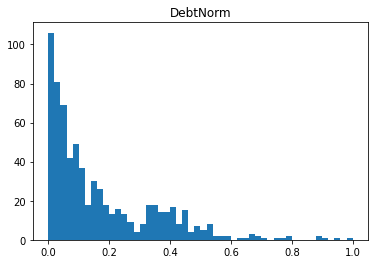

In [ ]:
d = DataFrame["Debt"]
plt.hist(d, bins = 50)
plt.title('DebtNorm')
plt.show()

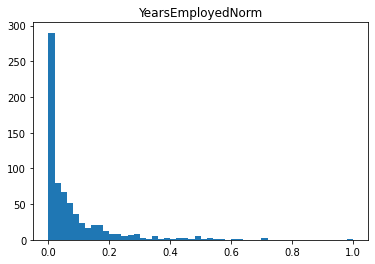

In [ ]:
e = DataFrame["YearsEmployed"]
plt.hist(e, bins = 50)
plt.title('YearsEmployedNorm')
plt.show()

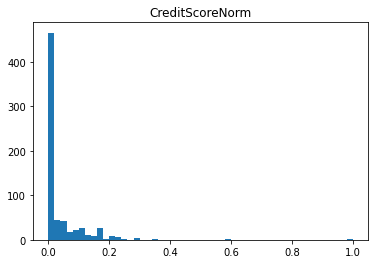

In [ ]:
c = DataFrame["CreditScore"]
plt.hist(c, bins = 50)
plt.title('CreditScoreNorm')
plt.show()

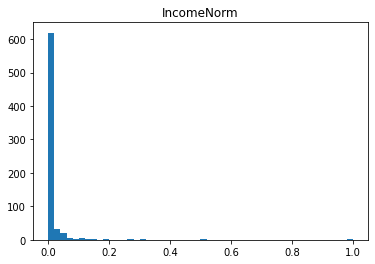

In [ ]:
i = DataFrame["Income"]
plt.hist(i, bins = 50)
plt.title('IncomeNorm')
plt.show()

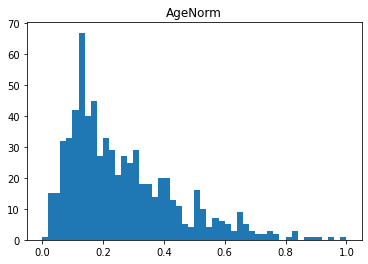

In [ ]:
a = DataFrame["Age_Imputed"]
plt.hist(a, bins = 50)
plt.title('AgeNorm')
plt.show()

In [ ]:
#df = (df.to_numpy())

In [ ]:
#df

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import *
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Approved = list(DataFrame['Approved'])

<BarContainer object of 2 artists>

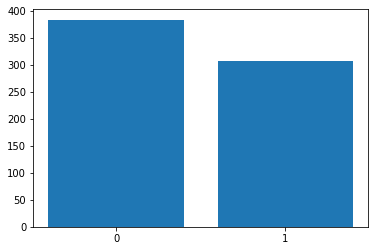

In [ ]:
plt.bar(["0","1"], height = [Approved.count('0'), Approved.count('1')])

In [ ]:
X_ols = df.iloc[:,1:6]
Y_ols = df.iloc[:,0]

X_ols = sm.add_constant(X_ols)

model = sm.OLS(Y_ols.astype(float), X_ols.astype(float))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Approved   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     51.44
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.71e-45
Time:                        19:17:53   Log-Likelihood:                -386.47
No. Observations:                 690   AIC:                             784.9
Df Residuals:                     684   BIC:                             812.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1507      0.033      4.549      

All variables are statistically significant and thus can and should be included in the model. Our X variables are therefore Employed, Income, Age, Debt and Credit Score. While our Y variable is Approved.


In [ ]:
#Get X and Y
Array = np.array(X_ols, dtype='float')
X = Array
Y = np.array(Y_ols)

print(X.shape)
print(Y.shape)


(690, 6)
(690,)


In [ ]:
#Split Data into train, test, validate

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=42)
x_train,x_validate,y_train,y_validate = train_test_split(x_train, y_train, test_size=0.20, random_state=42)
print(x_train.shape)
print(x_validate.shape)
print(x_test.shape)


(276, 6)
(69, 6)
(345, 6)


# 1st model : Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import r2_score

clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(x_train, y_train)

yhat1 = clf.predict(x_validate)
R_square = r2_score(y_validate, yhat1)

print('Coefficient of Determination', R_square) 


Coefficient of Determination -0.11290322580645151


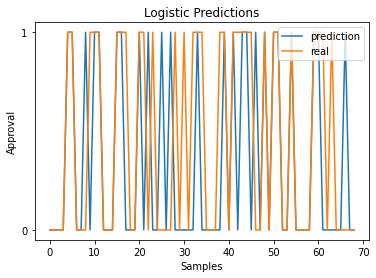

In [ ]:
plt.title('Logistic Predictions')
plt.plot(yhat1, label='prediction')
plt.plot(y_validate, label='real')
plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.ylabel('Approval')
plt.show()

Build Confusion Matrix for Analysis

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_pred_clf = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred_clf))

[[151  40]
 [ 51 103]]


In [ ]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       191
           1       0.72      0.67      0.69       154

    accuracy                           0.74       345
   macro avg       0.73      0.73      0.73       345
weighted avg       0.74      0.74      0.74       345



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [ ]:
probs = clf.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)


AUC: 0.79


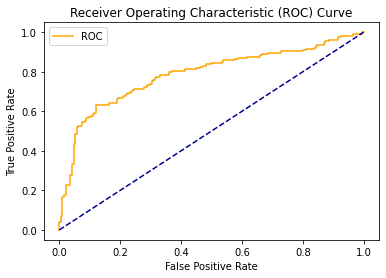

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label='1')
plot_roc_curve(fpr, tpr)


# 2nd model : K-Nearest Neighbor

In [ ]:
# Running a function that records the knn score from n=1 to n=100
score = []
x = np.arange(1, 100)
for i in x :
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  score.append(knn.score(x_validate, y_validate))

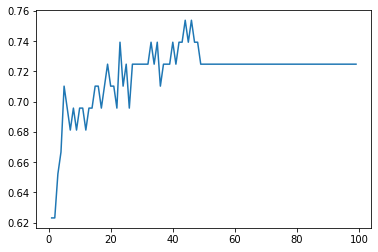

In [ ]:
# Plotting the test set scores
plt.plot(x, score)

In [ ]:
# maximum score
max(score)

0.7536231884057971

In [ ]:
# find the n_neighbors that returns the maximum score
def find_index(input): 
    index = 0 
    for index in range(len(score)):
      if score[index] == input: 
        return(index)
      else : index+=1

In [ ]:
print(find_index(max(score)))

43


We'll use n_neighbors = 43, which gave us the maximum score.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(x_train, y_train)

yhat2 = knn.predict(x_validate)
R_square = r2_score(y_validate, yhat2) 

print('Coefficient of Determination', R_square) 

Coefficient of Determination -0.05432937181663822


In [ ]:
# Confusion matrix
y_pred_knn = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred_knn))

[[157  34]
 [ 53 101]]


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       191
           1       0.75      0.66      0.70       154

    accuracy                           0.75       345
   macro avg       0.75      0.74      0.74       345
weighted avg       0.75      0.75      0.75       345



# 3rd model : Support Vector Machine

([<matplotlib.axis.XTick at 0x7f0e89ba8fd0>,
 <a list of 3 Text major ticklabel objects>)

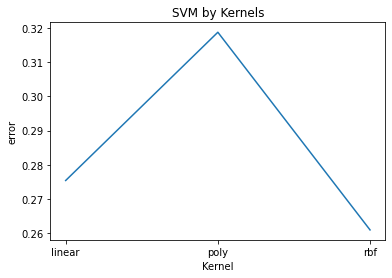

In [ ]:
# Choosing the kernel
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    svm_model = svm.SVC(kernel=kernel_value, C=16)
    svm_model.fit(X=x_train, y=y_train)
    error = 1. - svm_model.score(x_validate, y_validate)
    svm_kernel_error.append(error)

plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)

Text(0, 0.5, 'error')

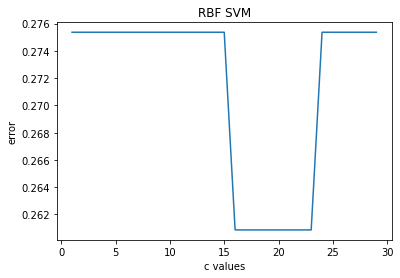

In [ ]:
# Choosing the best c
c_range = range(1,30)
svm_c_error = []
for c_value in c_range:
    svm_model = svm.SVC(kernel='rbf', C=c_value)
    svm_model.fit(X=x_train, y=y_train)
    error = 1. - svm_model.score(x_validate, y_validate)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('RBF SVM')
plt.xlabel('c values')
plt.ylabel('error')

In [ ]:
# Best SVM model
best_kernel = 'rbf'
best_c = 16

In [ ]:
svm_model = svm.SVC(kernel=best_kernel, C=best_c)
svm_model.fit(X=x_train, y=y_train)

yhat3 = svm_model.predict(x_validate)
R_square = r2_score(y_validate, yhat3)

print('Coefficient of Determination', R_square) 

Coefficient of Determination -0.05432937181663822


In [ ]:
# Confusion matrix
y_pred_svm = svm_model.predict(x_test)
print(confusion_matrix(y_test,y_pred_svm))

[[154  37]
 [ 51 103]]


In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       191
           1       0.74      0.67      0.70       154

    accuracy                           0.74       345
   macro avg       0.74      0.74      0.74       345
weighted avg       0.74      0.74      0.74       345



# 4th model : Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

Multilayer perceptrons (Feed-forward Neural Network) as MLP

([<matplotlib.axis.XTick at 0x7f0e899cbb10>,
 <a list of 3 Text major ticklabel objects>)

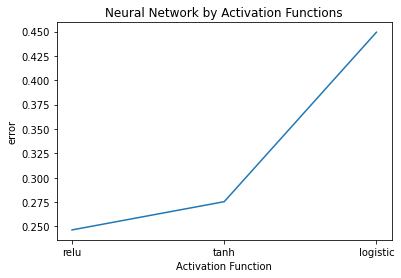

In [ ]:
# Choosing the activation function
func_types = ['relu', 'tanh', 'logistic']
mlp_func_error = []
for func_value in func_types:
    mlp = MLPClassifier(hidden_layer_sizes=(6,6,6), activation=func_value, solver='adam', max_iter=1000)
    mlp.fit(x_train, y_train)
    error = 1. - mlp.score(x_validate, y_validate)
    mlp_func_error.append(error)

plt.plot(func_types, mlp_func_error)
plt.title('Neural Network by Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('error')
plt.xticks(func_types)

Activation functions :
*   ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
*   ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x)
*   ‘logistic’ :  the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x))

We'll use relu as the activation function since it gave the lowest error with the validation samples.

([<matplotlib.axis.XTick at 0x7f0e899ad1d0>,
 <a list of 9 Text major ticklabel objects>)

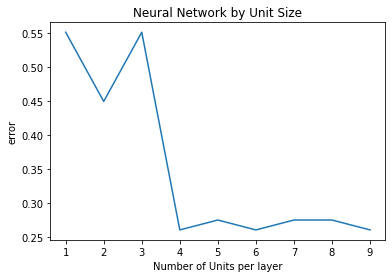

In [ ]:
# Choosing the best number of units per layer with 2 hidden layers
unit_range = range(1,10)
mlp_unit_error = []

for unit_value in unit_range:
    mlp = MLPClassifier(hidden_layer_sizes=(unit_value, unit_value), activation='relu', solver='adam', max_iter=1000)
    mlp.fit(x_train, y_train)
    error = 1. - mlp.score(x_validate, y_validate)
    mlp_unit_error.append(error)

plt.plot(unit_range, mlp_unit_error)
plt.title('Neural Network by Unit Size')
plt.xlabel('Number of Units per layer')
plt.ylabel('error')
plt.xticks(unit_range)

([<matplotlib.axis.XTick at 0x7f0e898f4c10>,
 <a list of 9 Text major ticklabel objects>)

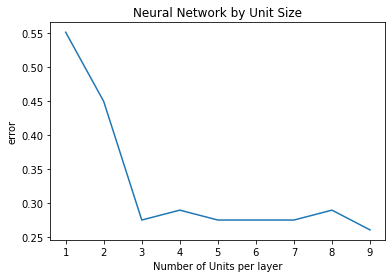

In [ ]:
# Choosing the best number of units per layer with 3 hidden layers
unit_range = range(1,10)
mlp_unit_error = []

for unit_value in unit_range:
    mlp = MLPClassifier(hidden_layer_sizes=(unit_value,unit_value,unit_value), activation='relu', solver='adam', max_iter=1000)
    mlp.fit(x_train, y_train)
    error = 1. - mlp.score(x_validate, y_validate)
    mlp_unit_error.append(error)

plt.plot(unit_range, mlp_unit_error)
plt.title('Neural Network by Unit Size')
plt.xlabel('Number of Units per layer')
plt.ylabel('error')
plt.xticks(unit_range)

([<matplotlib.axis.XTick at 0x7f0e8976f210>,
 <a list of 9 Text major ticklabel objects>)

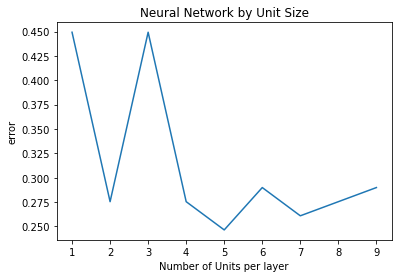

In [ ]:
# Choosing the best number of units per layer with 4 hidden layers
unit_range = range(1,10)
mlp_unit_error = []

for unit_value in unit_range:
    mlp = MLPClassifier(hidden_layer_sizes=(unit_value,unit_value,unit_value, unit_value), activation='relu', solver='adam', max_iter=1000)
    mlp.fit(x_train, y_train)
    error = 1. - mlp.score(x_validate, y_validate)
    mlp_unit_error.append(error)

plt.plot(unit_range, mlp_unit_error)
plt.title('Neural Network by Unit Size')
plt.xlabel('Number of Units per layer')
plt.ylabel('error')
plt.xticks(unit_range)

In [ ]:
# Best MLP model
# activation function = relu
# number of hidden layer = 4
# number of unit per layer = 5
mlp_model = MLPClassifier(hidden_layer_sizes=(5,5,5,5), activation='relu', solver='adam', max_iter=1000)
mlp_model.fit(x_train, y_train)

yhat4 = np.array(mlp_model.predict(x_validate), dtype=np.int)
R_square = r2_score(y_validate, yhat4)

print('Coefficient of Determination', R_square) 

Coefficient of Determination -0.11290322580645151


In [ ]:
# Confusion matrix
y_pred_mlp = mlp_model.predict(x_test)
print(confusion_matrix(y_test,y_pred_mlp))

[[169  22]
 [ 58  96]]


In [ ]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       191
           1       0.81      0.62      0.71       154

    accuracy                           0.77       345
   macro avg       0.78      0.75      0.76       345
weighted avg       0.78      0.77      0.76       345



# Choosing the best model

In [ ]:
clf.score(x_test, y_test)

0.736231884057971

In [ ]:
knn.score(x_test, y_test)

0.7478260869565218

In [ ]:
svm_model.score(x_test, y_test)

0.744927536231884

In [ ]:
mlp_model.score(x_test, y_test)

0.7681159420289855

Highest accuracy comes from the Neural Network model, which is to be expected. The results, however, appear to be extremely close suggesting that any of these models are almost interchangable as they all achieve accuracies between 0.736-0.768, a range of only 0.032. The scores also suggest that each of these models still has room for improvement and that all of them remain limited in their predictive power. 